In [8]:
import numpy as np 
import matplotlib.pyplot as plt 

In [9]:
def plot_series(time,value,start=0,end=None,label=None):
    plt.figure(figsize=(12,8))
    plt.plot(time[start:end],value[start:end],"-",c="green",label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend()
    plt.grid(True)

## Trend in Time series

In [10]:
def trend(time,slope=0):
    return time*slope

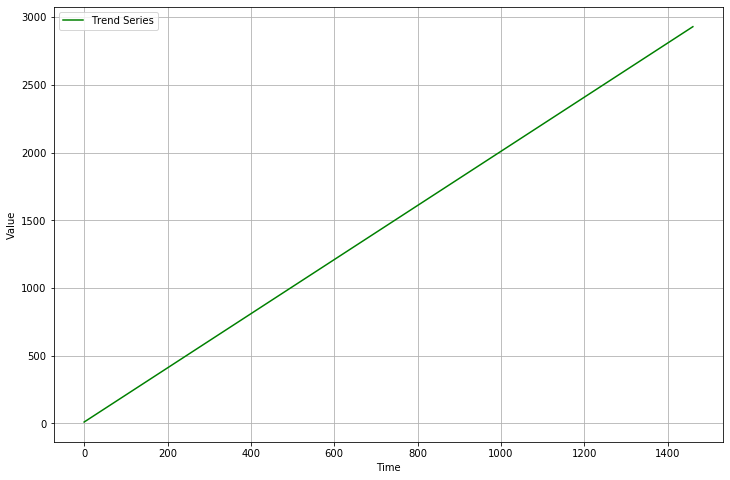

In [11]:
time = np.arange(4 * 365 + 1)
baseline = 10
trend_series = baseline + trend(time,2)
plot_series(time,trend_series,label="Trend Series")

## Creating seasonality in Time Series

In [12]:
def seasonal_pattern(season_time):
    return np.where(season_time < 0.4, np.tan(season_time * 2 * np.pi), 1 / np.exp(3 * season_time))

def seasonal_series(time,period,amplitude=1,phase=0):
    season_time = ((time + phase) % period)/period
    return amplitude * seasonal_pattern(season_time)

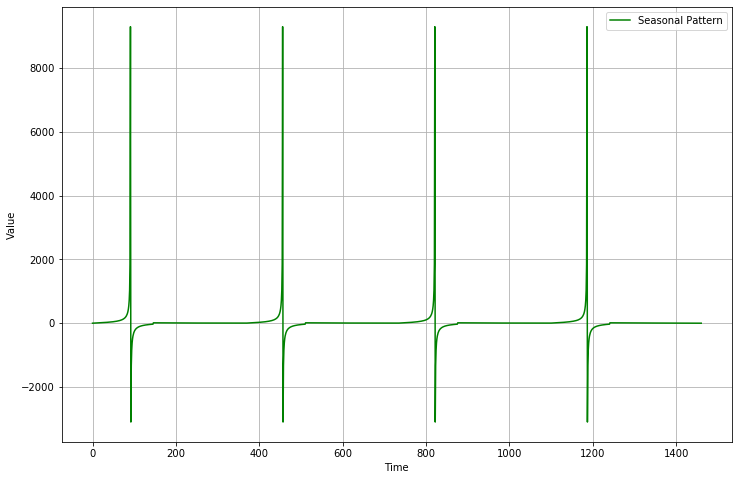

In [13]:
amplitude = 40
series = seasonal_series(time,365,amplitude)
plot_series(time,series,label="Seasonal Pattern")

### Now a time series with both trend and seasonality

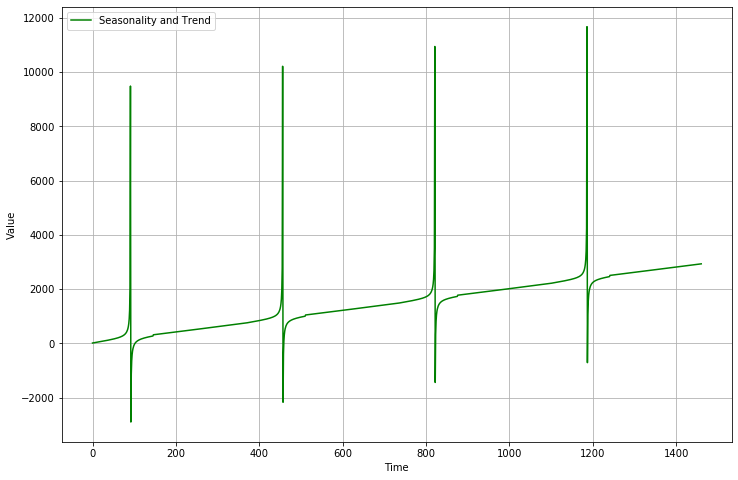

In [14]:
series += trend_series
plot_series(time,series,label="Seasonality and Trend")

## Creating some noise

In [17]:
def noise(time, noise_level=1, seed=None):
    rd = np.random.RandomState(seed)
    return rd.randn(len(time)) * noise_level

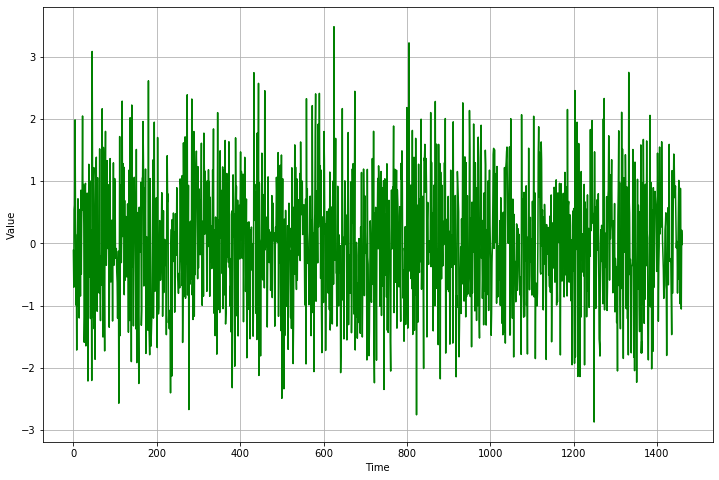

In [18]:
white_noise = noise(time)
plot_series(time,white_noise)

### Creating a series having trend, seasonality and noise

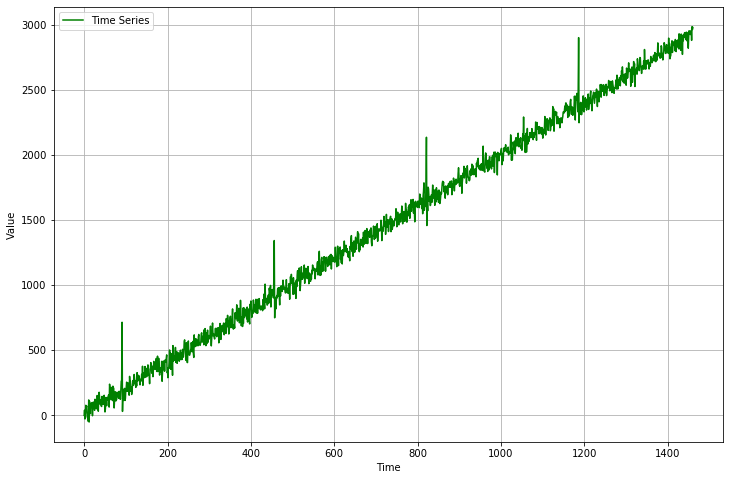

In [20]:
time_series = baseline + trend(time,slope=2) + seasonal_series(time,365,2) + noise(time, noise_level=45)
plot_series(time,time_series,label="Time Series")